In [177]:
import scipy.io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utils import *
from ridge import ridge
from logistic_r import logistic_r

warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Implement Ridge Regression

In [156]:
train_data = scipy.io.loadmat('data/digit_train.mat')
test_data = scipy.io.loadmat('data/digit_test.mat')

x_train = train_data['X']
y_train = train_data['y']
x_test = test_data['X_test']
y_test = test_data['y_test']

x_train_n, mean, std = norm(x_train)
x_test_n, _, _ = norm(x_test,mean,std)

lambs = [1e-3, 1e-2, 1e-1, 1e-12, 1, 1e1, 1e2, 1e3];

In [157]:
best_e = 100
lamb = 0
evals = []
wTws = []

for l in lambs:
    e_val = 0
    wtw = 0
    n = x_train_n.shape[1]
    for j in range(n):
        x_ = np.delete(x_train_n,[j],axis=1)
        y_ = np.delete(y_train,[j],axis=1)
        w = ridge(x_,y_,l)
        wTw += (w.T@w)[0][0]
        e_val += y_train[0,j] * (w.T@np.concatenate([np.array([1]),x_train_n[:,j]]))[0] < 0
    wTws.append(wTw/n)
    e_val = e_val/n
    if e_val<best_e:
        best_e, lamb = e_val, l
    print('When labmda = %f  Error rate = %f'%(l, e_val))
    
print('Best labmda = %f, with error rate = %f'%(lamb, best_e))  

When labmda = 0.001000  Error rate = 0.110000
When labmda = 0.010000  Error rate = 0.110000
When labmda = 0.100000  Error rate = 0.110000
When labmda = 0.000000  Error rate = 0.505000
When labmda = 1.000000  Error rate = 0.105000
When labmda = 10.000000  Error rate = 0.060000
When labmda = 100.000000  Error rate = 0.035000
When labmda = 1000.000000  Error rate = 0.035000
Best labmda = 100.000000, with error rate = 0.035000


In [175]:
n_train = x_train_n.shape[1]
n_test = x_test_n.shape[1]
for l in [1e-12,100]:
    w = ridge(x_,y_,l)
    wTw = (w.T@w)[0][0]    
    e_train = np.sum(y_train * (w.T@add_bias(x_train_n)) < 0)
    e_test = np.sum(y_test * (w.T@add_bias(x_test_n)) < 0)
    if l<1:
        print("Without regularization: w^2 = ",wTw)
        print('Train error = %f, Test error = %f\n'%(e_train/n_train,e_test/n_test))
    else:
        print("With regularization: w^2 = ",wTw)
        print('Train error = %f, Test error = %f \n'%(e_train/n_train,e_test/n_test))

Without regularization: w^2 =  6.979759322571388e+25
Train error = 0.470000, Test error = 0.462079

With regularization: w^2 =  0.13293260766987608
Train error = 0.000000, Test error = 0.065294 



# Implement Logistic Regression

In [184]:
best_e = 100
lamb = 0
evals = []
wTws = []

for l in lambs:
    e_val = 0
    wtw = 0
    n = x_train_n.shape[1]
    for j in range(n):
        x_ = np.delete(x_train_n,[j],axis=1)
        y_ = np.delete(y_train,[j],axis=1)
        w = logistic_r(x_,y_,l)
        wTw += (w.T@w)[0][0]
        e_val += y_train[0,j] * (w.T@np.concatenate([np.array([1]),x_train_n[:,j]]))[0] < 0
    wTws.append(wTw/n)
    e_val = e_val/n
    if e_val<best_e:
        best_e, lamb = e_val, l
    print('When labmda = %f  Error rate = %f'%(l, e_val))
    
print('Best labmda = %f, with error rate = %f'%(lamb, best_e))  

When labmda = 0.001000  Error rate = 0.055000
When labmda = 0.010000  Error rate = 0.060000
When labmda = 0.100000  Error rate = 0.045000
When labmda = 0.000000  Error rate = 0.060000
When labmda = 1.000000  Error rate = 0.060000
When labmda = 10.000000  Error rate = 0.650000
When labmda = 100.000000  Error rate = 0.595000
When labmda = 1000.000000  Error rate = 0.530000
Best labmda = 0.100000, with error rate = 0.045000


In [186]:
n_train = x_train_n.shape[1]
n_test = x_test_n.shape[1]
for l in [1e-12,0.1]:
    w = logistic_r(x_,y_,l)
    wTw = (w.T@w)[0][0]    
    e_train = np.sum(y_train * (w.T@add_bias(x_train_n)) < 0)
    e_test = np.sum(y_test * (w.T@add_bias(x_test_n)) < 0)
    if l<1:
        print("Without regularization: w^2 = ",wTw)
        print('Train error = %f, Test error = %f\n'%(e_train/n_train,e_test/n_test))
    else:
        print("With regularization: w^2 = ",wTw)
        print('Train error = %f, Test error = %f \n'%(e_train/n_train,e_test/n_test))

Without regularization: w^2 =  3767.08860962411
Train error = 0.000000, Test error = 0.081868

Without regularization: w^2 =  65.8032831357282
Train error = 0.000000, Test error = 0.075339



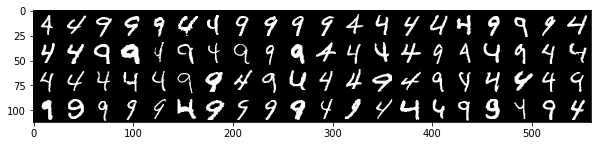

In [27]:
show_digit(x_train)